In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/pokemon/Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.shape

(800, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
df.drop(columns = ['#','Name','Type 1','Type 2'],inplace = True)

In [8]:
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,1,False
2,525,80,82,83,100,100,80,1,False
3,625,80,100,123,122,120,80,1,False
4,309,39,52,43,60,50,65,1,False


<AxesSubplot:>

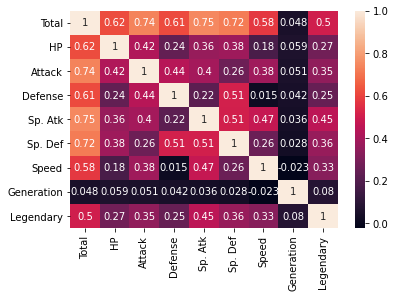

In [9]:
sns.heatmap(df.corr(),annot = True)

In [10]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df['Legendary'] = le.fit_transform(df['Legendary'])

In [14]:
df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [15]:
df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('Legendary',axis = 1)
y = df['Legendary']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Using Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb = GaussianNB()

In [22]:
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [23]:
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy:0.93


Using KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred_knn)))

Accuracy:0.97


Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [27]:
svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred_svm)))

Accuracy:0.95


Using Decision tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred_dt)))

Accuracy:0.98


Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(max_depth = 7)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred_rfc)))

Accuracy:0.96


XGBOOST

In [32]:
import xgboost as xgb

In [33]:
xb = xgb.XGBClassifier(objective = 'binary:logistic',random_state = 42)
xb.fit(X_train,y_train)
y_pred_xgb = xb.predict(X_test)
print('Accuracy:{:.2f}'.format(accuracy_score(y_test,y_pred_xgb)))

[13:02:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:0.97


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
